In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import cv2
import joblib
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# 프로세서 확인, 이미지 ,load

In [2]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 10449179629794699539
 xla_global_id: -1,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 4851040256
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 16547686120983248604
 physical_device_desc: "device: 0, name: NVIDIA GeForce GTX 1060 6GB, pci bus id: 0000:01:00.0, compute capability: 6.1"
 xla_global_id: 416903419]

In [5]:
path="D:\Image_data"

In [6]:
train_datagen = ImageDataGenerator(rescale=1./255,
    validation_split=0.2) # set validation split

train_generator = train_datagen.flow_from_directory(
    path,
    target_size=(250, 250),
    class_mode='categorical',
    subset='training') # set as training data
validation_generator = train_datagen.flow_from_directory(
    path, # same directory as training data
    target_size=(250, 250),
    class_mode='categorical',
    subset='validation') # set as validation data



Found 5826 images belonging to 4 classes.
Found 1454 images belonging to 4 classes.


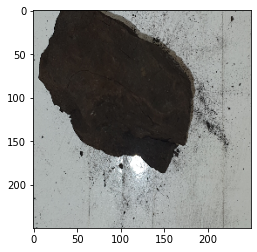

In [7]:
plt.imshow(train_generator[0][0][0])

# 모델 생성

In [131]:
img_list.dtype

dtype('float32')

In [130]:
train_generator[0][0].dtype

dtype('float32')

In [11]:
model = keras.Sequential([
    keras.layers.Conv2D(8, kernel_size=7,activation="relu", padding="SAME", input_shape=[250, 250, 3]),
    keras.layers.Conv2D(8, kernel_size=7,activation="relu", padding="SAME", input_shape=[250, 250, 3]),
    keras.layers.MaxPool2D(2),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(16, kernel_size=5,activation="relu", padding="SAME"),
    keras.layers.Conv2D(16, kernel_size=5,activation="relu", padding="SAME"),
    keras.layers.MaxPool2D(2),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(32, kernel_size=3,activation="relu", padding="SAME"),
    keras.layers.Conv2D(16, kernel_size=5,activation="relu", padding="SAME"),
    keras.layers.MaxPool2D(2),
    keras.layers.BatchNormalization(), 
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(32, activation="relu"),
    keras.layers.Dense(4, activation="softmax")

])

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 250, 250, 8)       1184      
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 250, 250, 8)       3144      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 125, 125, 8)       0         
_________________________________________________________________
batch_normalization_9 (Batch (None, 125, 125, 8)       32        
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 125, 125, 16)      3216      
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 125, 125, 16)      6416      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 62, 62, 16)       

In [22]:
model = keras.Sequential([
    keras.layers.Conv2D(8, kernel_size=7,activation="relu",kernel_initializer="he_normal", padding="SAME", input_shape=[250, 250, 3]),
    keras.layers.MaxPool2D(2),
    keras.layers.Conv2D(16, kernel_size=5,activation="relu",kernel_initializer="he_normal", padding="SAME"),

    keras.layers.MaxPool2D(2),
    keras.layers.Conv2D(32, kernel_size=3,activation="relu", kernel_initializer="he_normal",padding="SAME"),

    keras.layers.MaxPool2D(2),
    keras.layers.Flatten(),
    keras.layers.Dense(4, activation="softmax")

])

activation = "tanh"

In [18]:
batch_size=32
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit_generator(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // batch_size,
    epochs = 3)

Epoch 1/3
182/182 [==============================] - 1206s 7s/step - loss: 0.9128 - accuracy: 0.6274 - val_loss: 0.4663 - val_accuracy: 0.8229
Epoch 2/3
182/182 [==============================] - 1144s 6s/step - loss: 0.3968 - accuracy: 0.8531 - val_loss: 0.2465 - val_accuracy: 0.9215
Epoch 3/3
182/182 [==============================] - 1228s 7s/step - loss: 0.1448 - accuracy: 0.9603 - val_loss: 0.0841 - val_accuracy: 0.9806


he_normal 초기화

In [23]:
batch_size=32
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit_generator(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // batch_size,
    epochs = 3)

C:\Users\hjhhi\anaconda3\envs\python3.9.0\lib\site-packages\tensorflow\python\keras\engine\training.py:1963: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/3
182/182 [==============================] - 1218s 7s/step - loss: 0.8652 - accuracy: 0.6817 - val_loss: 0.3002 - val_accuracy: 0.8986
Epoch 2/3
182/182 [==============================] - 1125s 6s/step - loss: 0.2471 - accuracy: 0.9151 - val_loss: 0.0849 - val_accuracy: 0.9806
Epoch 3/3
182/182 [==============================] - 1227s 7s/step - loss: 0.0537 - accuracy: 0.9881 - val_loss: 0.0433 - val_accuracy: 0.9896


In [ ]:
model = keras.Sequential([
    keras.layers.Conv2D(8, kernel_size=7,activation="", padding="SAME", input_shape=[250, 250, 3]),
    keras.layers.MaxPool2D(2),
    keras.layers.Conv2D(16, kernel_size=5,activation="tanh", padding="SAME"),

    keras.layers.MaxPool2D(2),
    keras.layers.Conv2D(32, kernel_size=3,activation="tanh", padding="SAME"),

    keras.layers.MaxPool2D(2),
    keras.layers.Flatten(),
    keras.layers.Dense(4, activation="softmax")

])

In [26]:
model = keras.Sequential([
    keras.layers.Conv2D(8, kernel_size=7,activation="relu",kernel_initializer="he_normal", padding="SAME", 
                        input_shape=[250, 250, 3]),
    keras.layers.MaxPool2D(2),
    keras.layers.BatchNormalization(),
    
    keras.layers.Conv2D(16, kernel_size=5,activation="relu",kernel_initializer="he_normal", padding="SAME"),
    keras.layers.MaxPool2D(2),
    keras.layers.BatchNormalization(),

    keras.layers.Conv2D(32, kernel_size=3,activation="relu", kernel_initializer="he_normal",padding="SAME"),
    keras.layers.MaxPool2D(2),
    keras.layers.BatchNormalization(),
    

    keras.layers.Flatten(),
    keras.layers.Dense(64, activation="relu", kernel_initializer="he_normal"),
    keras.layers.Dense(16, activation="relu", kernel_initializer="he_normal"),
    keras.layers.Dense(4, activation="softmax")

])

In [27]:
batch_size=32
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit_generator(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // batch_size,
    epochs = 3)

C:\Users\hjhhi\anaconda3\envs\python3.9.0\lib\site-packages\tensorflow\python\keras\engine\training.py:1963: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/3
182/182 [==============================] - 1197s 7s/step - loss: 0.4633 - accuracy: 0.8486 - val_loss: 5.9901 - val_accuracy: 0.1840
Epoch 2/3
182/182 [==============================] - 1095s 6s/step - loss: 0.0278 - accuracy: 0.9940 - val_loss: 4.9837 - val_accuracy: 0.2139
Epoch 3/3
182/182 [==============================] - 1085s 6s/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.7506 - val_accuracy: 0.7493


In [28]:
model = keras.Sequential([
    keras.layers.Conv2D(8, kernel_size=7,activation="relu",kernel_initializer="he_normal", padding="SAME", 
                        input_shape=[250, 250, 3]),
    keras.layers.MaxPool2D(2),
    keras.layers.BatchNormalization(),
    
    keras.layers.Conv2D(16, kernel_size=5,activation="relu",kernel_initializer="he_normal", padding="SAME"),
    keras.layers.MaxPool2D(2),
    keras.layers.BatchNormalization(),

    keras.layers.Conv2D(32, kernel_size=3,activation="relu", kernel_initializer="he_normal",padding="SAME"),
    keras.layers.MaxPool2D(2),
    keras.layers.BatchNormalization(),
    

    keras.layers.Flatten(),
    keras.layers.Dense(4, activation="softmax")

])

In [29]:
batch_size=32
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit_generator(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // batch_size,
    epochs = 3)

Epoch 1/3
182/182 [==============================] - 1070s 6s/step - loss: 0.6784 - accuracy: 0.8697 - val_loss: 16.2879 - val_accuracy: 0.1861
Epoch 2/3
182/182 [==============================] - 1108s 6s/step - loss: 0.0459 - accuracy: 0.9865 - val_loss: 2.2459 - val_accuracy: 0.5979
Epoch 3/3
182/182 [==============================] - 1097s 6s/step - loss: 0.0435 - accuracy: 0.9888 - val_loss: 9.2517 - val_accuracy: 0.4493


In [6]:
model = keras.Sequential([
    keras.layers.Conv2D(8, kernel_size=7,kernel_initializer="he_normal", padding="SAME", input_shape=[250, 250, 3]),
    keras.layers.BatchNormalization(),
    keras.layers.ReLU(),
    keras.layers.MaxPool2D(2),
    
    keras.layers.Conv2D(16, kernel_size=5,kernel_initializer="he_normal", padding="SAME"),
    keras.layers.BatchNormalization(),
    keras.layers.ReLU(),
    keras.layers.MaxPool2D(2),

    keras.layers.Conv2D(32, kernel_size=3, kernel_initializer="he_normal",padding="SAME"),
    keras.layers.BatchNormalization(),
    keras.layers.ReLU(),
    keras.layers.MaxPool2D(2),
    

    keras.layers.Flatten(),
    keras.layers.Dense(4, activation="softmax")

])

In [7]:
batch_size=32
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit_generator(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // batch_size,
    epochs = 5)

C:\Users\hjhhi\anaconda3\envs\python3.9.0\lib\site-packages\tensorflow\python\keras\engine\training.py:1963: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
182/182 [==============================] - 1064s 6s/step - loss: 1.3224 - accuracy: 0.7739 - val_loss: 3.7746 - val_accuracy: 0.3694
Epoch 2/5
182/182 [==============================] - 1038s 6s/step - loss: 0.1652 - accuracy: 0.9486 - val_loss: 1.6013 - val_accuracy: 0.7083
Epoch 3/5
182/182 [==============================] - 1017s 6s/step - loss: 0.1374 - accuracy: 0.9596 - val_loss: 0.1042 - val_accuracy: 0.9694
Epoch 4/5
182/182 [==============================] - 1030s 6s/step - loss: 0.1104 - accuracy: 0.9751 - val_loss: 0.0936 - val_accuracy: 0.9653
Epoch 5/5
182/182 [==============================] - 1032s 6s/step - loss: 0.0318 - accuracy: 0.9907 - val_loss: 1.4751 - val_accuracy: 0.7569


## best_model

In [6]:
model = keras.Sequential([
    keras.layers.Conv2D(8, kernel_size=7,activation="relu",kernel_initializer="he_normal", padding="SAME", 
                        input_shape=[250, 250, 3]),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(2),
    
    keras.layers.Conv2D(16, kernel_size=5,activation="relu",kernel_initializer="he_normal", padding="SAME"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(2),

    keras.layers.Conv2D(32, kernel_size=3,activation="relu", kernel_initializer="he_normal",padding="SAME"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(2),
    

    keras.layers.Flatten(),
    keras.layers.Dense(4, activation="softmax")

])

In [7]:
batch_size=32
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit_generator(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // batch_size,
    epochs = 5)

C:\Users\hjhhi\anaconda3\envs\python3.9.0\lib\site-packages\tensorflow\python\keras\engine\training.py:1963: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
182/182 [==============================] - 1210s 7s/step - loss: 1.9018 - accuracy: 0.7789 - val_loss: 16.1360 - val_accuracy: 0.1861
Epoch 2/5
182/182 [==============================] - 1037s 6s/step - loss: 0.1601 - accuracy: 0.9610 - val_loss: 15.7773 - val_accuracy: 0.2181
Epoch 3/5
182/182 [==============================] - 1065s 6s/step - loss: 0.0500 - accuracy: 0.9848 - val_loss: 1.2310 - val_accuracy: 0.7437
Epoch 4/5
182/182 [==============================] - 1102s 6s/step - loss: 0.0572 - accuracy: 0.9857 - val_loss: 0.4397 - val_accuracy: 0.8944
Epoch 5/5
182/182 [==============================] - 1191s 7s/step - loss: 0.0257 - accuracy: 0.9914 - val_loss: 0.0722 - val_accuracy: 0.9812


In [71]:
img_list = joblib.load("./img_array.pkl")
img_list = np.float32(img_list)
img_list = img_list/255.0

In [29]:
print(np.where(label_list==0)[0][0])
print(np.where(label_list==1)[0][0])
print(np.where(label_list==2)[0][0])
print(np.where(label_list==3)[0][0])

0
2224
4392
5944


In [118]:
pd.Series(label_list).value_counts()

0    2224
1    2168
2    1552
3    1336
dtype: int64

In [121]:
pd.Series(np.argmax(validation_generator[0][1], axis=-1)).value_counts()

1    12
0    11
3     5
2     4
dtype: int64

In [122]:
img_list_temp = np.append(img_list[0:12],img_list[2168: 2179], axis=0 )
img_list_temp = np.append(img_list_temp,img_list[4392:4397], axis=0 )
img_list_temp = np.append(img_list_temp,img_list[5944:5948], axis=0 )

In [84]:
img_list_temp.shape

(40, 250, 250, 3)

In [85]:
label_list_temp = np.array([0]*10 + [1]*10+ [2]*10+ [3]*10)

In [128]:
label_list_temp = np.array([0]*12 + [1]*11+ [2]*5+ [3]*4)

In [86]:
label_list_temp

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [10]:
### (250, 250)픽셀로 읽어 들이는데 19분
### 픽셀값 변경을 원할떄만 실행시키며 그렇지 않은 경우 아래의 joblib을 이용하여 가져올 것, 실행시간: 5초 이하
img_list=[]
label_list=[]
for i in os.listdir(path):
    print("Progressing...")
    for j in os.listdir(os.path.join(path, i)):
#         img = cv2.imread(os.path.join(path, i, j))
#         img = cv2.resize(img, (250, 250), interpolation=cv2.INTER_LINEAR)
#         img_list.append(img)
        label_list.append(i)
label_list = np.array(label_list).astype("int16")

Progressing...
Progressing...
Progressing...
Progressing...


In [49]:
# X_train, X_test, y_train, y_test = train_test_split(img_list, label_list, test_size=0.05, random_state=777, stratify=label_list) 

In [82]:
model.predict_classes(X)

array([0], dtype=int64)

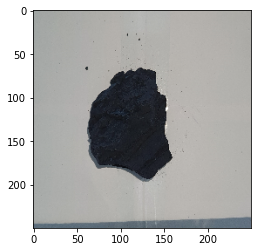

In [65]:
plt.imshow(img_list[0])

In [129]:
y_pred = np.argmax(model.predict(img_list_temp), axis=-1)
print(classification_report(label_list_temp, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83        12
           1       0.67      0.73      0.70        11
           2       0.80      0.80      0.80         5
           3       1.00      0.75      0.86         4

    accuracy                           0.78        32
   macro avg       0.82      0.78      0.80        32
weighted avg       0.79      0.78      0.78        32



In [105]:
y_pred = np.argmax(model.predict(img_list_temp), axis=-1)
print(classification_report(label_list_temp, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.80      0.84        10
           1       0.43      0.60      0.50        10
           2       0.80      0.80      0.80        10
           3       0.86      0.60      0.71        10

    accuracy                           0.70        40
   macro avg       0.74      0.70      0.71        40
weighted avg       0.74      0.70      0.71        40



In [134]:
y_pred = np.argmax(model.predict(validation_generator[0][0]), axis=-1)

In [116]:
y_pred = np.argmax(model.predict(validation_generator[0][0]), axis=-1)
print(classification_report(np.argmax(validation_generator[0][1], axis=-1), y_pred))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95        11
           1       0.86      1.00      0.92        12
           2       1.00      0.75      0.86         4
           3       1.00      1.00      1.00         5

    accuracy                           0.94        32
   macro avg       0.96      0.91      0.93        32
weighted avg       0.95      0.94      0.94        32



In [117]:
y_pred = np.argmax(model.predict(validation_generator[3][0]), axis=-1)
print(classification_report(np.argmax(validation_generator[3][1], axis=-1), y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00         2

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32



In [111]:
validation_generator[0][0].shape

(32, 250, 250, 3)

In [114]:
validation_generator[0][1]

(32, 4)

In [106]:
model.evaluate_generator(validation_generator)

C:\Users\hjhhi\anaconda3\envs\python3.9.0\lib\site-packages\tensorflow\python\keras\engine\training.py:1996: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[0.0715901181101799, 0.9814305305480957]

# fit_generator를 이용한 fit, validation

In [16]:
batch_size=32
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit_generator(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // batch_size,
    epochs = 3)

Epoch 1/3
182/182 [==============================] - 1252s 7s/step - loss: 0.7478 - accuracy: 0.6864 - val_loss: 0.3904 - val_accuracy: 0.8597
Epoch 2/3
182/182 [==============================] - 1071s 6s/step - loss: 0.2980 - accuracy: 0.8921 - val_loss: 0.1522 - val_accuracy: 0.9569
Epoch 3/3
182/182 [==============================] - 1055s 6s/step - loss: 0.1196 - accuracy: 0.9572 - val_loss: 0.1658 - val_accuracy: 0.9382


# 샘플, batch별 결과 chk`

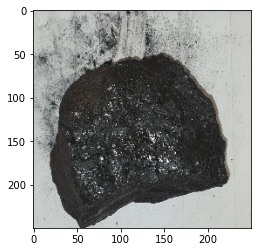

In [22]:
plt.imshow(validation_generator[0][0][0])

generator에 대하여 이터레이팅 해보면 라벨값이 one-hot형태로 들어가있는걸 알 수 있으므로  
loss=sparse~가 아니라 그냥 categorical사용 

ValueError: num must be 1 <= num <= 20, not 21

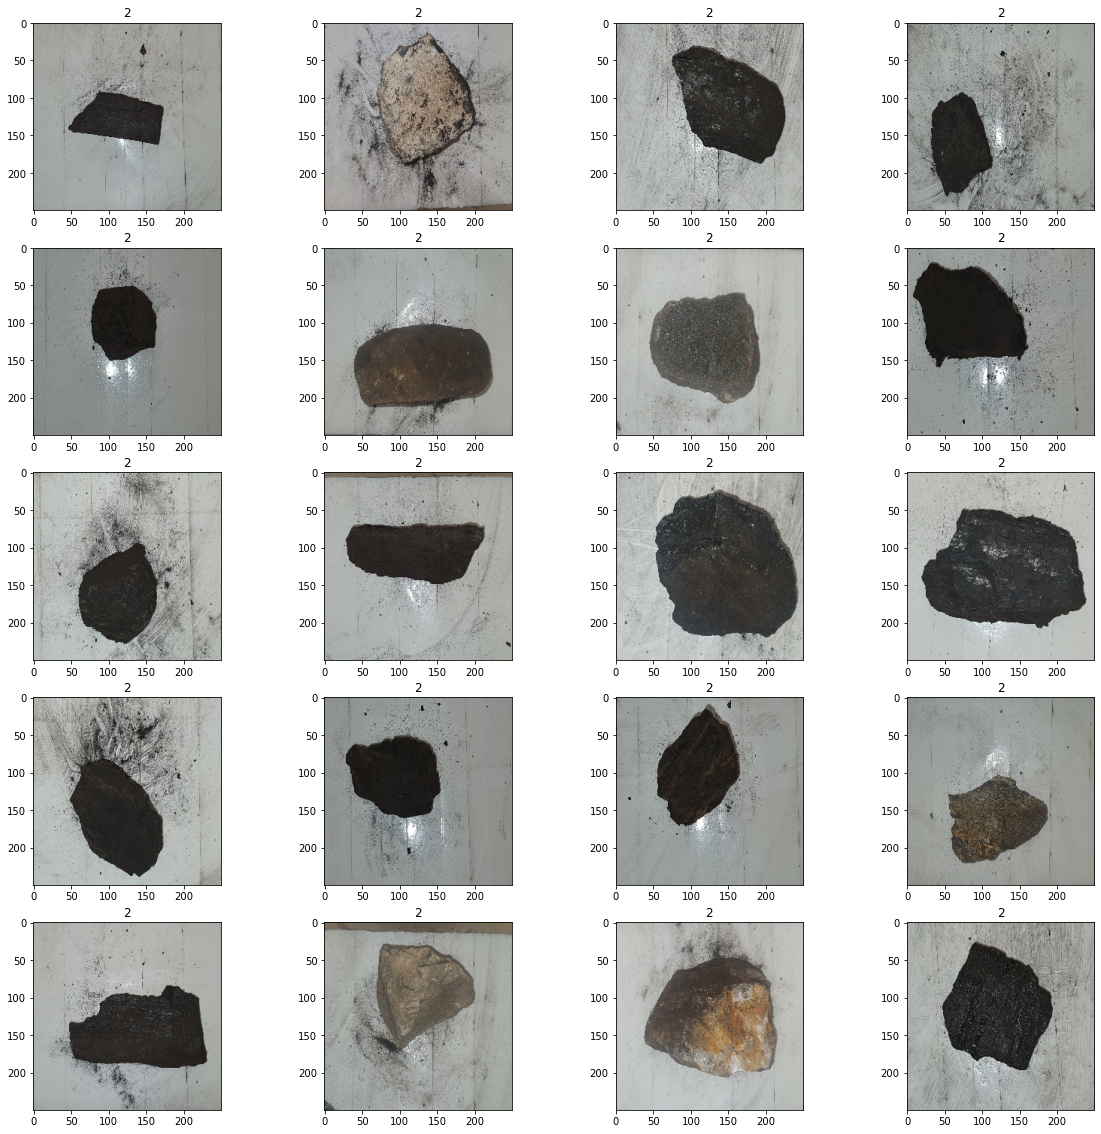

In [44]:
fig = plt.figure(figsize=(20, 20))
axs = []

for x_data, t_data in validation_generator:
    for idx, img in enumerate(x_data):
        axs.append(fig.add_subplot(5,4,idx+1))
        plt.title(np.argmax(t_data))
        plt.imshow(img)
    break

In [45]:
validation_generator.reset()

In [47]:
output = model.predict_generator(validation_generator)

C:\Users\hjhhi\anaconda3\envs\python3.9.0\lib\site-packages\tensorflow\python\keras\engine\training.py:2024: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [49]:
print(validation_generator.class_indices)

{'0': 0, '1': 1, '2': 2, '3': 3}


In [50]:
y_pred = np.argmax(output, axis=1)

In [53]:
loss, acc = model.evaluate_generator(validation_generator)
print(acc)

C:\Users\hjhhi\anaconda3\envs\python3.9.0\lib\site-packages\tensorflow\python\keras\engine\training.py:1996: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


0.9374140501022339
